<a href="https://colab.research.google.com/github/raghavendhar-899/StockPrediction_Treeregressor/blob/master/StockPredic_Treeregressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# impoert reguired lib
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import datetime as dt
import pandas_datareader.data as web
plt.style.use('bmh')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
# get perv data
start = dt.datetime(2000, 5, 1)
end = dt.datetime.now()
# df = web.DataReader("TSLA", start, end)
df = web.get_data_yahoo('RELIANCE.NS', start, end)
df.reset_index(inplace=True)
# df.set_index("Date", inplace=True)
# df = df.drop("Symbol", axis=1)
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2000-05-02,55.393799,50.801701,54.355099,51.410900,105156355.0,23.228067
1,2000-05-03,52.145000,48.294800,51.075001,51.231201,88097873.0,23.146881
2,2000-05-04,53.566299,51.699799,51.699799,52.668201,72521150.0,23.796133
3,2000-05-05,53.347599,51.246899,52.871300,52.379200,71351697.0,23.665560
4,2000-05-08,52.637001,50.340900,51.699799,50.606499,37718360.0,22.864630
...,...,...,...,...,...,...,...
4957,2020-05-27,1454.000000,1412.000000,1431.000000,1445.550049,16460756.0,1445.550049
4958,2020-05-28,1479.750000,1449.000000,1455.000000,1472.250000,18518271.0,1472.250000
4959,2020-05-29,1472.000000,1452.650024,1468.000000,1464.400024,18470390.0,1464.400024
4960,2020-06-01,1538.349976,1475.949951,1480.000000,1520.349976,18434012.0,1520.349976


In [3]:
# get no:of Trading days
df.shape

(4962, 7)

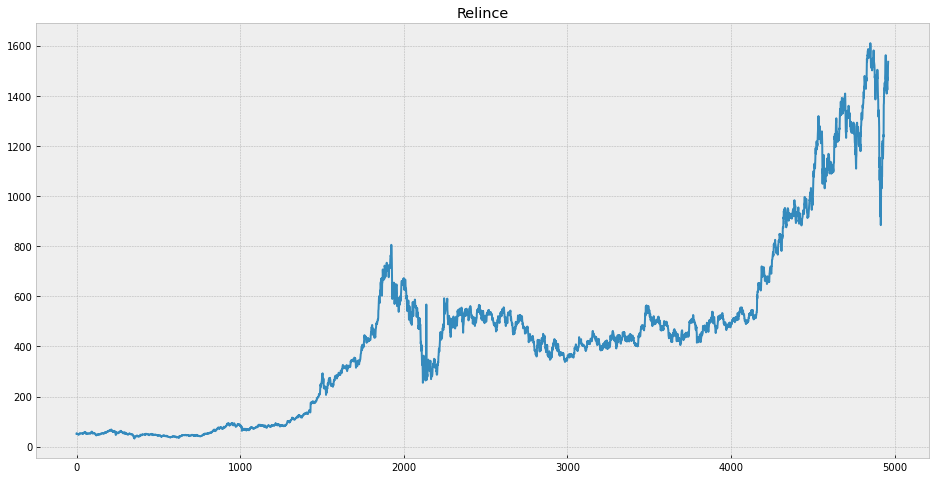

In [4]:
# graph of close price
plt.figure(figsize=(16,8))
plt.title('Relince')
plt.plot(df["Close"])

In [5]:
import plotly.express as px

fig = px.line(df, x='Date', y='Close')
fig.show()

In [0]:
# get the close price
future_days = 10
for i in range(future_days):
  df=df[["Close"]].append([0])
df.reset_index(inplace=True)

df=df[["Close"]]

In [7]:
df

,Close
0,51.410900
1,51.231201
2,52.668201
3,52.379200
4,50.606499
...,...
4967,NaN
4968,NaN
4969,NaN
4970,NaN


In [8]:
# create variable to predict 'x' days

# create a nwe colum (target data) shifted 'x' units/days up
df["prediction"]=df[["Close"]].shift(-future_days)

df[-121:]

,Close,prediction
4851,1575.849976,1535.300049
4852,1609.949951,1537.150024
4853,1599.099976,1501.500000
4854,1571.400024,1524.599976
4855,1546.449951,1513.150024
...,...,...
4967,NaN,NaN
4968,NaN,NaN
4969,NaN,NaN
4970,NaN,NaN


In [9]:
# create the feature data set (x) and convert it to a numpy array and remove the 'x rows/days
x= np.array(df.drop(['prediction'],1))[:-future_days*2]
print(len(x))
x

4952


array([[  51.41090012],
       [  51.23120117],
       [  52.66820145],
       ...,
       [1435.94995117],
       [1459.40002441],
       [1440.75      ]])

In [10]:
# create the target data set (y)  and convert it to a numpy arrayand get all of the target values except the laste 'x' rows/dayes
y=np.array(df['prediction'])[:-future_days*2]
y

array([  49.57559967,   49.80210114,   48.4353981 , ..., 1464.40002441,
       1520.34997559, 1535.69995117])

In [0]:
# split 75% data for training and 25% for testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.05)
# print(x_train)
# print()
# print(x_test)
# print()
# print(y_train)
# print()
# print(y_test)
# print()

In [0]:
# create model
# decision tree regressor mode
# tree=DecisionTreeRegressor().fit(x,y)
tree=DecisionTreeRegressor().fit(x_train,y_train)
# linear regression model
# lr=LinearRegression().fit(x,y)
lr=LinearRegression().fit(x_train,y_train)

In [13]:
#  get the last x rows from future data set
# future_days=100
x_future=df.drop(['prediction'],1)[:-future_days]
x_future=x_future.tail(future_days*2)
x_future=np.array(x_future)
x_future

array([[1446.93005371],
       [1447.0300293 ],
       [1492.80004883],
       [1547.13000488],
       [1561.98999023],
       [1465.35998535],
       [1496.44995117],
       [1435.94995117],
       [1459.40002441],
       [1440.75      ],
       [1408.90002441],
       [1433.69995117],
       [1441.25      ],
       [1431.55004883],
       [1424.05004883],
       [1445.55004883],
       [1472.25      ],
       [1464.40002441],
       [1520.34997559],
       [1535.69995117]])

In [14]:
#  show model tree predictoin
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
# show model linear regression prediction
lr_prediction=lr.predict(x_future)
print(lr_prediction)

[1408.90002441 1433.69995117 1441.25       1431.55004883 1424.05004883
 1445.55004883 1472.25       1464.40002441 1520.34997559 1474.15002441
 1267.40002441 1444.94995117 1474.15002441 1427.80004883 1440.75
 1561.55004883 1569.84997559 1470.84997559 1433.65002441 1537.90002441]

[1449.6293253  1449.72930486 1495.50114308 1549.83325796 1564.69383378
 1468.05998926 1499.15119045 1438.64878646 1462.0997915  1443.44902602
 1411.59778487 1436.39869706 1443.94904589 1434.24870929 1426.74841127
 1448.24926558 1474.95027769 1467.09999018 1523.05216454 1538.40275007]


            Close  prediction  predictions
4952  1408.900024         NaN  1408.900024
4953  1433.699951         NaN  1433.699951
4954  1441.250000         NaN  1441.250000
4955  1431.550049         NaN  1431.550049
4956  1424.050049         NaN  1424.050049
4957  1445.550049         NaN  1445.550049
4958  1472.250000         NaN  1472.250000
4959  1464.400024         NaN  1464.400024
4960  1520.349976         NaN  1520.349976
4961  1535.699951         NaN  1474.150024
4962          NaN         NaN  1267.400024
4963          NaN         NaN  1444.949951
4964          NaN         NaN  1474.150024
4965          NaN         NaN  1427.800049
4966          NaN         NaN  1440.750000
4967          NaN         NaN  1561.550049
4968          NaN         NaN  1569.849976
4969          NaN         NaN  1470.849976
4970          NaN         NaN  1433.650024
4971          NaN         NaN  1537.900024


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



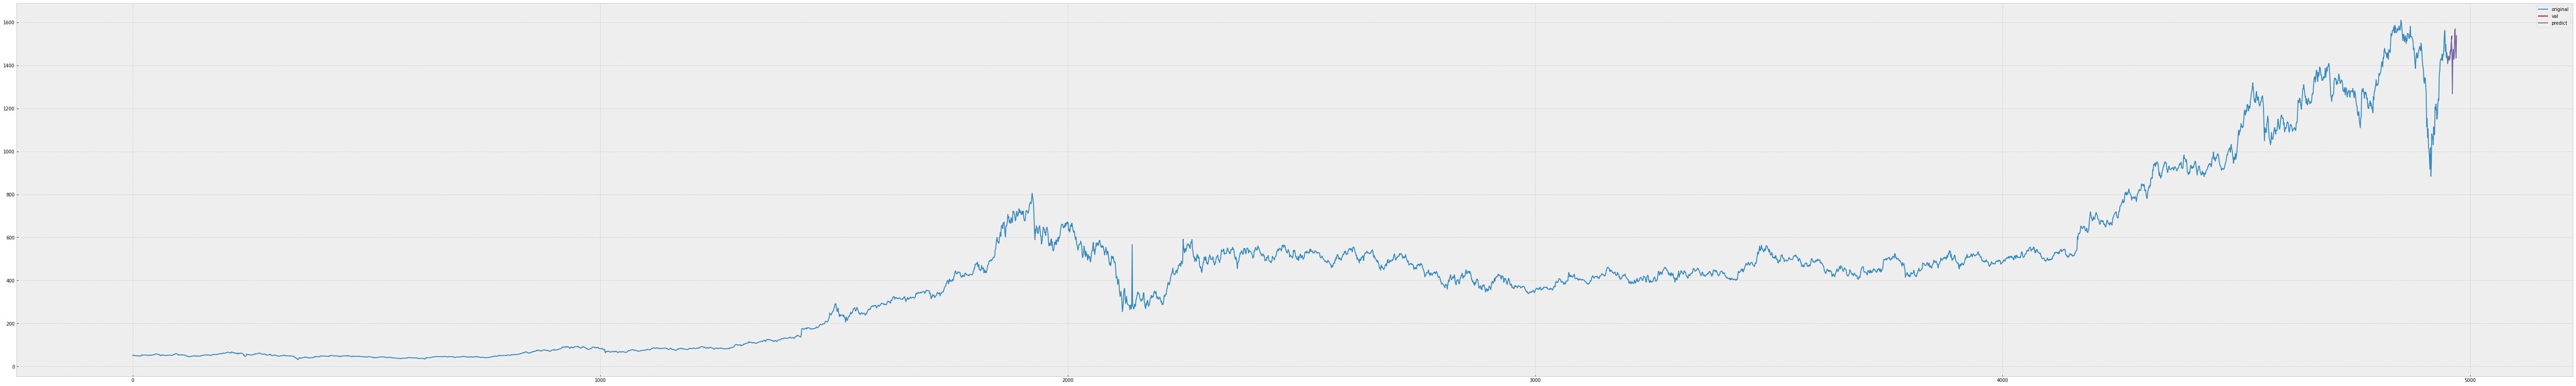

In [15]:
# visualize data for tree
predictions = tree_prediction
# print(df[-100:])
valid=df[x.shape[0]:]

valid['predictions']=predictions
print(valid[-50:])
plt.figure(figsize=(100,15))
plt.plot(df['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['original','val','predict'])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



            Close  prediction  predictions
4952  1408.900024         NaN  1449.629325
4953  1433.699951         NaN  1449.729305
4954  1441.250000         NaN  1495.501143
4955  1431.550049         NaN  1549.833258
4956  1424.050049         NaN  1564.693834
4957  1445.550049         NaN  1468.059989
4958  1472.250000         NaN  1499.151190
4959  1464.400024         NaN  1438.648786
4960  1520.349976         NaN  1462.099792
4961  1535.699951         NaN  1443.449026
4962          NaN         NaN  1411.597785
4963          NaN         NaN  1436.398697
4964          NaN         NaN  1443.949046
4965          NaN         NaN  1434.248709
4966          NaN         NaN  1426.748411
4967          NaN         NaN  1448.249266
4968          NaN         NaN  1474.950278
4969          NaN         NaN  1467.099990
4970          NaN         NaN  1523.052165
4971          NaN         NaN  1538.402750


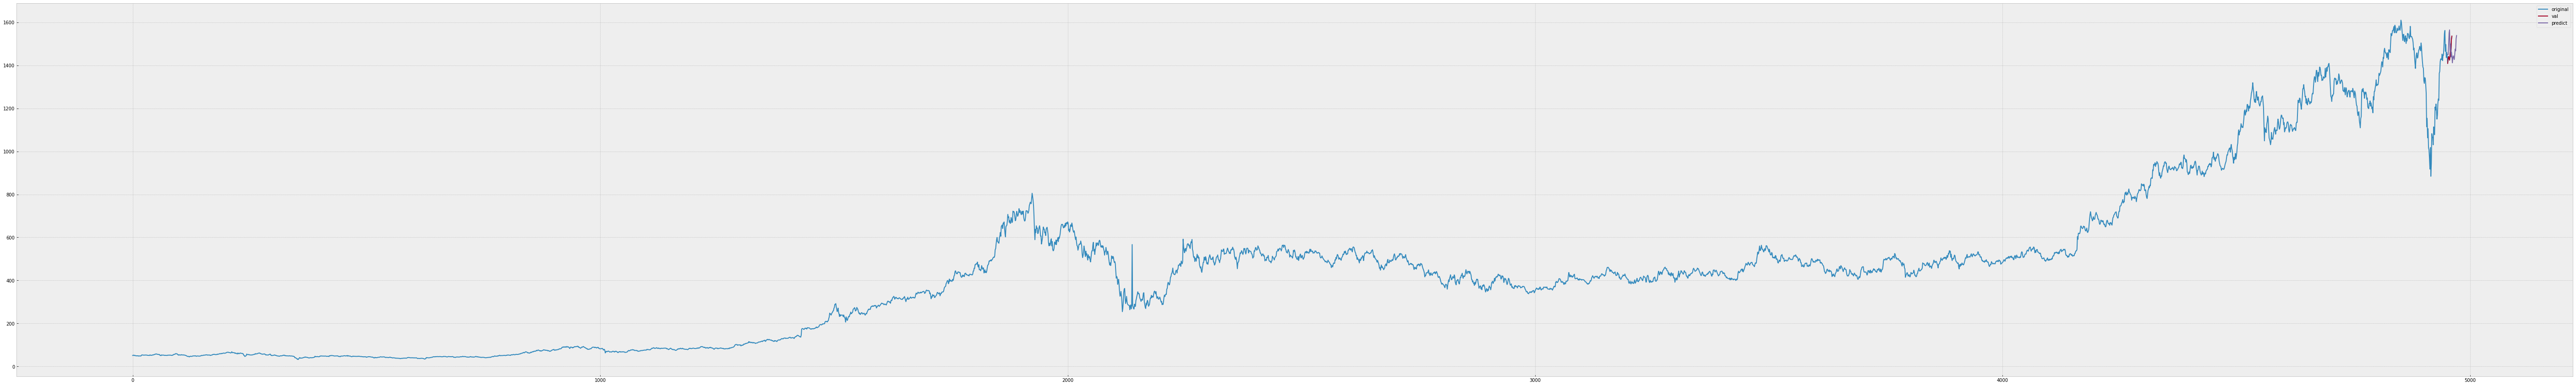

In [16]:
# visualize data for linear regresion
predictions = lr_prediction

valid=df[x.shape[0]:]
valid['predictions']=predictions
print(valid[-50:])

plt.figure(figsize=(100,15))
plt.plot(df['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['original','val','predict'])
plt.show()